In [81]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt

In [82]:
train_set = torchvision.datasets.MNIST('../data',train=True,download=False,transform=transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.MNIST('../data',download=False,train=False,transform=transforms.Compose([transforms.ToTensor()]))

In [83]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=256,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=256,shuffle=True)

In [84]:
class MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16,3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,stride=2,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,stride=2,padding=1)
        self.lrelu = nn.LeakyReLU()
        self.relu = nn.ReLU()
        self.out1 = nn.Linear(1024,128)
        self.out2 = nn.Linear(128,10)

    def forward(self,x):
        out = self.conv1(x)
        out = self.lrelu(out)
        out = self.conv2(out)
        out = self.lrelu(out)
        out = self.conv3(out)
        out = self.lrelu(out)
        out = out.view(out.size(0),-1)
        out = self.out1(out)
        out = self.lrelu(out)
        out = self.out2(out)
        return out

In [85]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [86]:
model = MNIST()
model.to(device)

MNIST(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (lrelu): LeakyReLU(negative_slope=0.01)
  (relu): ReLU()
  (out1): Linear(in_features=1024, out_features=128, bias=True)
  (out2): Linear(in_features=128, out_features=10, bias=True)
)

In [92]:
from torchsummary import summary
summary(model,(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 14, 14]          160
├─LeakyReLU: 1-2                         [-1, 16, 14, 14]          --
├─Conv2d: 1-3                            [-1, 32, 7, 7]            4,640
├─LeakyReLU: 1-4                         [-1, 32, 7, 7]            --
├─Conv2d: 1-5                            [-1, 64, 4, 4]            18,496
├─LeakyReLU: 1-6                         [-1, 64, 4, 4]            --
├─Linear: 1-7                            [-1, 128]                 131,200
├─LeakyReLU: 1-8                         [-1, 128]                 --
├─Linear: 1-9                            [-1, 10]                  1,290
Total params: 155,786
Trainable params: 155,786
Non-trainable params: 0
Total mult-adds (M): 0.68
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.59
Estimated Total Size (MB): 0.64


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 14, 14]          160
├─LeakyReLU: 1-2                         [-1, 16, 14, 14]          --
├─Conv2d: 1-3                            [-1, 32, 7, 7]            4,640
├─LeakyReLU: 1-4                         [-1, 32, 7, 7]            --
├─Conv2d: 1-5                            [-1, 64, 4, 4]            18,496
├─LeakyReLU: 1-6                         [-1, 64, 4, 4]            --
├─Linear: 1-7                            [-1, 128]                 131,200
├─LeakyReLU: 1-8                         [-1, 128]                 --
├─Linear: 1-9                            [-1, 10]                  1,290
Total params: 155,786
Trainable params: 155,786
Non-trainable params: 0
Total mult-adds (M): 0.68
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.59
Estimated Total Size (MB): 0.64

In [87]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

In [88]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [89]:
num_epochs = 50
prog_bar = tqdm(range(num_epochs))
train_iter = iter(train_loader)
for epoch in prog_bar:
    image,label = next(iter(train_loader))
    image, label = image.to(device),label.to(device)
    out = model(image)
    loss = nn.functional.cross_entropy(out,label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    prog_bar.set_description(desc=f"Loss: {loss.item()}")

Loss: 0.1692117601633072: 100%|██████████| 50/50 [00:03<00:00, 14.47it/s] 


In [90]:
image,label = next(iter(train_loader))
image,label = image.to(device),label.to(device)
accuracy(model(image),label)

tensor(0.9531)

5

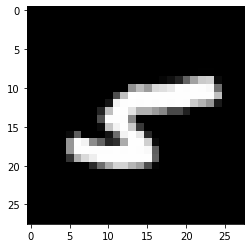

In [91]:
index = 10
image,label = next(iter(test_loader))
image,label = image.to(device),label.to(device)
a = model(image)
plt.imshow(image[index].cpu().permute(1,2,0),cmap='gray')
_,pred = torch.max(a,dim=1)
pred[index].item()
